In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (5,3)

In [2]:
PATH_FOLDER = os.getcwd()

In [3]:
def dataclean_ftl_duplicate_references(oa):
    '''
    Removes FTL rows that have reference numbers that show up more than once
    '''
    assert "TRANSPORT_MODE" in oa.columns
    assert "REFERENCE_NUMBER" in oa.columns
    oa_ftl = oa[oa["TRANSPORT_MODE"]=="FTL"]
    temp_counter = oa_ftl["REFERENCE_NUMBER"].value_counts()
    temp_counter = temp_counter.reset_index().rename(columns={"index":"REFERENCE_NUMBER","REFERENCE_NUMBER":"count"})
    oa_ftl_counted = oa_ftl.merge(temp_counter,on=["REFERENCE_NUMBER"])
    oa_ftl_duplicate_reference_numbers = oa_ftl_counted[oa_ftl_counted["count"]>1]
    oa = oa.drop(list(oa_ftl_duplicate_reference_numbers.index), axis=0)    
    return oa

def dataclean_nonquote_ftl(oa):
    assert "OFFER_TYPE" in oa.columns
    assert "TRANSPORT_MODE" in oa.columns    
    oa = oa[~((oa["TRANSPORT_MODE"]=="FTL") & (oa["OFFER_TYPE"]!="quote"))]
    return oa


PATH_FILE_oa = PATH_FOLDER + "\\oa.csv"

data_clean_first_time = False
if data_clean_first_time:
    oa_orders = dataclean_ftl_duplicate_references(oa_orders)
    oa = oa_orders.merge(oa_offers, on=["REFERENCE_NUMBER"])
    oa = dataclean_ftl_duplicate_references(oa)
else:
    oa = pd.read_csv(PATH_FILE_oa)
oa = dataclean_nonquote_ftl(oa)

In [6]:
#  estimated cost to deliver

In [7]:
oa

,REFERENCE_NUMBER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,DELIVERY_TIME_CONSTRAINT,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,...,COVERING_OFFER,LOAD_DELIVERED_FROM_OFFER,RECOMMENDED_LOAD,VALID,ZIP3,Xcoord,Ycoord,ZIP3_dest,Xcoord_dest,Ycoord_dest
0,76aceba45071865cc063e408a6e8df29227a0aa0b068c1...,2021-05-18 14:09:13,2021-05-24 15:00:00,NONE,382,456,472.0,52.0,1.0,1.0,...,0,0,0,1,382,-88.674553,36.298184,456,-82.856504,38.972217
1,38ddf0800307e11e1c52bd96311b6eda0d498c58b48074...,2021-05-18 14:05:16,2021-05-21 15:00:00,NONE,382,456,472.0,52.0,1.0,1.0,...,0,0,0,1,382,-88.674553,36.298184,456,-82.856504,38.972217
2,38ddf0800307e11e1c52bd96311b6eda0d498c58b48074...,2021-05-18 14:05:16,2021-05-21 15:00:00,NONE,382,456,472.0,52.0,1.0,1.0,...,0,0,0,1,382,-88.674553,36.298184,456,-82.856504,38.972217
3,38ddf0800307e11e1c52bd96311b6eda0d498c58b48074...,2021-05-18 14:05:16,2021-05-21 15:00:00,NONE,382,456,472.0,52.0,1.0,1.0,...,1,1,0,1,382,-88.674553,36.298184,456,-82.856504,38.972217
4,df3ebe190d8104faaece45f3997da25f6a81deda1d209a...,2021-05-18 14:15:53,2021-05-26 15:00:00,NONE,382,456,472.0,52.0,1.0,1.0,...,1,1,0,1,382,-88.674553,36.298184,456,-82.856504,38.972217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294818,345fc7a0e066a9b1a9f0d609b723b246b5f792e8528268...,2022-08-16 13:00:05,2022-08-22 13:00:00,SCHEDULE,758,689,759.0,49.0,1.0,1.0,...,0,0,0,1,758,-95.669057,31.448533,689,-98.905744,40.338848
294819,345fc7a0e066a9b1a9f0d609b723b246b5f792e8528268...,2022-08-16 13:00:05,2022-08-22 13:00:00,SCHEDULE,758,689,759.0,49.0,1.0,1.0,...,0,0,0,1,758,-95.669057,31.448533,689,-98.905744,40.338848
294820,345fc7a0e066a9b1a9f0d609b723b246b5f792e8528268...,2022-08-16 13:00:05,2022-08-22 13:00:00,SCHEDULE,758,689,759.0,49.0,1.0,1.0,...,0,0,0,1,758,-95.669057,31.448533,689,-98.905744,40.338848
294821,345fc7a0e066a9b1a9f0d609b723b246b5f792e8528268...,2022-08-16 13:00:05,2022-08-22 13:00:00,SCHEDULE,758,689,759.0,49.0,1.0,1.0,...,0,0,0,1,758,-95.669057,31.448533,689,-98.905744,40.338848


In [4]:
oa.groupby(["TRANSPORT_MODE","OFFER_TYPE"])["REFERENCE_NUMBER"].count()
# So PTL has more pooled than FTL

TRANSPORT_MODE  OFFER_TYPE
CONSOLIDATOR    pool             424
                quote            439
FTL             pool              73
                quote         108829
LTL             pool            3342
                quote            224
PTL             pool           42318
                quote         137717
VLTL            pool            1365
                quote             92
Name: REFERENCE_NUMBER, dtype: int64

In [5]:
# See how 

## OA Secretary Approach (FTL vs PTL)

In [6]:
oa1 = oa.copy()

oa1 = oa1[oa1["TRANSPORT_MODE"].isin(["FTL", "PTL"])]

SORTED_COLUMN_NAMES = [
    "TRANSPORT_MODE",
    "REFERENCE_NUMBER","CREATED_ON_HQ"
]

oa1 = oa1.sort_values(SORTED_COLUMN_NAMES)

In [7]:
AGGDICT1 = dict()
AGGDICT1["RATE_USD"] = [list, np.argmin]
AGGDICT1["LOAD_DELIVERED_FROM_OFFER"] = [np.argmax, np.max]

GROUPBY_COLUMN_NAMES = [
    "TRANSPORT_MODE",
    "REFERENCE_NUMBER"
]

oa1_groupby = oa1.groupby(GROUPBY_COLUMN_NAMES,as_index=False).agg(AGGDICT1)


KeyboardInterrupt: 

In [ ]:
def secretary_approach(x):
    x = np.array(x)
    x *= -1
    len_x = len(x)
    # print(x)
    threshold = int(np.ceil(len_x//np.e))
    pre_threshold = x[:threshold]
    if len(pre_threshold) == 0:
        pre_threshold_max = -1*np.inf
    else:
        pre_threshold_max = np.max(pre_threshold)
    post_threshold = np.array(x[threshold:])
    first_post_threshold_max = np.where(pre_threshold_max < post_threshold)[0]
    if len(first_post_threshold_max)==0:
        return np.inf
    else:
        return first_post_threshold_max[0] + len(pre_threshold)
    
secretary_approach_results = oa1_groupby[("RATE_USD","list")].apply(secretary_approach)

In [ ]:
oa1_sec = pd.DataFrame() 
oa1_sec["secretary_stopped_idx"] = secretary_approach_results
oa1_sec["actual_stopped_idx"] = oa1_groupby[("LOAD_DELIVERED_FROM_OFFER","argmax")]
oa1_sec["actual_min_idx"] = oa1_groupby[("RATE_USD","argmin")]
oa1_sec.loc[oa1_groupby[("LOAD_DELIVERED_FROM_OFFER","amax")]==0,["actual_stopped_idx"]] = np.inf
oa1_sec["TRANSPORT_MODE"] = oa1_groupby[("TRANSPORT_MODE")]

In [ ]:
def compare(predicted, target):
    if predicted < target:
        result = "UNDERSHOOT"
    elif predicted > target:
        result = "OVERSHOOT"
    else:
        result = "MATCH"
    return result

In [ ]:
oa1_sec_metrics = oa1_sec.copy()
oa1_sec_metrics["actual_compare"] = oa1_sec.apply(lambda df: compare(
    df["actual_stopped_idx"], 
    df["actual_min_idx"]), axis=1)
oa1_sec_metrics["secretary_compare"] = oa1_sec.apply(lambda df: compare(
    df["secretary_stopped_idx"], 
    df["actual_min_idx"]), axis=1)

oa1_sec_metrics_summary = oa1_sec_metrics.melt(
    ["TRANSPORT_MODE"],["actual_compare","secretary_compare"]
).groupby(["TRANSPORT_MODE","variable"])["value"].value_counts(normalize=True).to_frame()

In [ ]:
oa1_sec_metrics_summary

## OA Secretary Approach (Pool vs Quote)

In [ ]:
oa2 = oa.copy()

oa2 = oa2[oa2["TRANSPORT_MODE"]=="PTL"] # REVISIT????

SORTED_COLUMN_NAMES = [
    "OFFER_TYPE",
    "REFERENCE_NUMBER","CREATED_ON_HQ"
]

oa2 = oa2.sort_values(SORTED_COLUMN_NAMES)

In [ ]:
AGGDICT1 = dict()
AGGDICT1["RATE_USD"] = [list, np.argmin]
AGGDICT1["LOAD_DELIVERED_FROM_OFFER"] = [np.argmax, np.max]

GROUPBY_COLUMN_NAMES = [
    "OFFER_TYPE",
    "REFERENCE_NUMBER"
]

oa2_groupby = oa2.groupby(GROUPBY_COLUMN_NAMES,as_index=False).agg(AGGDICT1)

In [ ]:
secretary_approach_results = oa2_groupby[("RATE_USD","list")].apply(secretary_approach)

oa2_sec = pd.DataFrame() 
oa2_sec["secretary_stopped_idx"] = secretary_approach_results
oa2_sec["actual_stopped_idx"] = oa2_groupby[("LOAD_DELIVERED_FROM_OFFER","argmax")]
oa2_sec["actual_min_idx"] = oa2_groupby[("RATE_USD","argmin")]
oa2_sec.loc[oa2_groupby[("LOAD_DELIVERED_FROM_OFFER","amax")]==0,["actual_stopped_idx"]] = np.inf
oa2_sec["OFFER_TYPE"] = oa2_groupby[("OFFER_TYPE")]

In [ ]:
oa2_sec_metrics = oa2_sec.copy()
oa2_sec_metrics["actual_compare"] = oa2_sec.apply(lambda df: compare(
    df["actual_stopped_idx"], 
    df["actual_min_idx"]), axis=1)
oa2_sec_metrics["secretary_compare"] = oa2_sec.apply(lambda df: compare(
    df["secretary_stopped_idx"], 
    df["actual_min_idx"]), axis=1)

oa2_sec_metrics_summary = oa2_sec_metrics.melt(
    ["OFFER_TYPE"],["actual_compare","secretary_compare"]
).groupby(["OFFER_TYPE","variable"])["value"].value_counts(normalize=True).to_frame()

In [ ]:
oa2_sec_metrics_summary

## Carrier and Pool

In [ ]:
# reference numbers that are given offer by a carrier more than once, for 1 commission

In [ ]:
oa0 = oa.copy()

oa0 = oa0[oa0["TRANSPORT_MODE"].isin(["FTL","PTL"])]

oa0_metrics = oa0.groupby([
    "TRANSPORT_MODE",
    "OFFER_TYPE",
    "REFERENCE_NUMBER",
            "CARRIER_ID"
], as_index=False).agg({"VALID": "count"})

oa0_metrics_verbose = oa0_metrics.groupby(
    [
        "TRANSPORT_MODE",
        "OFFER_TYPE",
    ],
    #as_index=False
)["VALID"].value_counts().to_frame()

_ = oa0_metrics.hist(by=["TRANSPORT_MODE","OFFER_TYPE"])

In [ ]:
#oa0.groupby(["REFERENCE_NUMBER"])["CARRIER_ID"].count()
#oa.groupby(["CARRIER_ID"])["REFERENCE_NUMBER"].count()

In [ ]:
oa.groupby(["CARRIER_ID"])["REFERENCE_NUMBER"].count()

In [ ]:
oap = oa.copy()

# oap = oap[oap["TRANSPORT_MODE"]=="PTL"] # inconclusive

oap["OFFER_TYPE"] = (oap["OFFER_TYPE"] == "pool").astype(int)

carrier_amount = oap.groupby(["CARRIER_ID"]).transform("count")[["REFERENCE_NUMBER"]]

oap["CARRIER_AMOUNT"] = (carrier_amount > 1).astype(int)

oap[["OFFER_TYPE","CARRIER_AMOUNT"]].corr()

## Datetime Involvement

In [34]:
oam = oa.copy()

In [35]:
oam["CREATED_ON_HQ"] = pd.to_datetime(oam["CREATED_ON_HQ"])

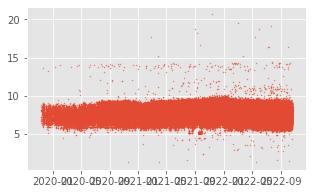

In [36]:
date_column = oam["CREATED_ON_HQ"]
rate_column = oam["RATE_USD"].apply(np.log1p)
_ = plt.scatter(date_column, rate_column,alpha=0.5, s=1)

In [37]:
#normalize by reference
oam["zscore(RATE_USD)"] = oam["RATE_USD"].apply(np.log1p)
oam["zscore(RATE_USD)"] = (
    oam.groupby(
    ["REFERENCE_NUMBER"])["RATE_USD"]
#).transform(
#lambda x: (x-np.mean(x))/(np.std(x) + 1)
).transform(
lambda x: (x-np.min(x)+1)/(np.max(x) - np.min(x) + 1)
)

In [38]:
oam["zscore(RATE_USD)"]

0         1.000000
1         0.187893
2         1.000000
3         0.000484
4         1.000000
            ...   
294818    0.692491
294819    0.231228
294820    0.308105
294821    0.769368
294822    1.000000
Name: zscore(RATE_USD), Length: 294823, dtype: float64

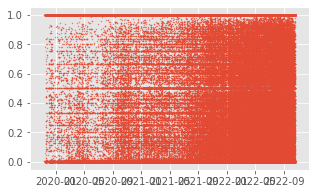

In [39]:
date_column = oam["CREATED_ON_HQ"]
rate_column = oam["zscore(RATE_USD)"]
_ = plt.scatter(date_column, rate_column,alpha=0.5, s=1)

In [40]:
oam.groupby(["OFFER_TYPE"])["zscore(RATE_USD)"].mean()

OFFER_TYPE
pool     0.573598
quote    0.475020
Name: zscore(RATE_USD), dtype: float64

In [41]:
# Questions: 
# which carriers will try to do a 2nd chance?
# given the time, what is rate usd?

In [42]:
oam["MONTH"] = oam["CREATED_ON_HQ"].dt.month
oam["DAY_OF_WEEK"] = oam["CREATED_ON_HQ"].dt.dayofweek
days_range = [0,1,2,3,4]
oam = oam[oam["DAY_OF_WEEK"].isin(days_range)]

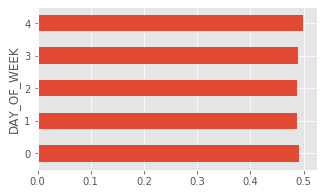

In [43]:
oam.groupby(["DAY_OF_WEEK"])["zscore(RATE_USD)"].mean().plot.barh()

In [44]:
mses = []
observed_means = oam.groupby(["DAY_OF_WEEK"])["zscore(RATE_USD)"].mean()

for t in range(1000):
    oam_sample = oam.sample(frac=0.25)
    sample_means = oam_sample.groupby(["DAY_OF_WEEK"])["zscore(RATE_USD)"].mean()
    mses.append(np.mean((observed_means-sample_means)**2))

(array([200., 307., 265., 126.,  66.,  18.,  12.,   3.,   2.,   1.]),
 array([1.06740025e-07, 3.79169653e-06, 7.47665303e-06, 1.11616095e-05,
        1.48465660e-05, 1.85315225e-05, 2.22164790e-05, 2.59014356e-05,
        2.95863921e-05, 3.32713486e-05, 3.69563051e-05]),
 <a list of 10 Patch objects>)

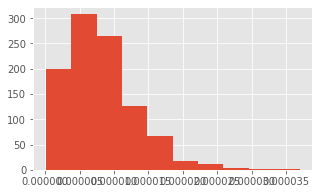

In [45]:
plt.hist(mses)

In [46]:
argmins = []

for t in range(1000):
    oam_sample = oam.sample(frac=0.25)
    sample_means = oam_sample.groupby(["DAY_OF_WEEK"])["zscore(RATE_USD)"].mean()
    argmin = np.argmin(sample_means)
    argmins.append(argmin)

In [47]:
pd.Series(argmins).value_counts()

2    408
1    324
3    178
0     90
dtype: int64

In [48]:
argmins = []

oam_ptl = oam[oam["TRANSPORT_MODE"]=="PTL"]
for t in range(1000):
    oam_sample = oam_ptl.sample(frac=0.25)
    sample_means = oam_sample.groupby(["DAY_OF_WEEK"])["zscore(RATE_USD)"].mean()
    argmin = np.argmin(sample_means)
    argmins.append(argmin)
pd.Series(argmins).value_counts()

0    387
1    310
2    216
3     86
4      1
dtype: int64

In [49]:
argmins = []

oam_ftl = oam[oam["TRANSPORT_MODE"]=="FTL"]
for t in range(1000):
    oam_sample = oam_ftl.sample(frac=0.25)
    sample_means = oam_sample.groupby(["DAY_OF_WEEK"])["zscore(RATE_USD)"].mean()
    argmin = np.argmin(sample_means)
    argmins.append(argmin)
pd.Series(argmins).value_counts()

2    542
3    250
1    194
0     11
4      3
dtype: int64

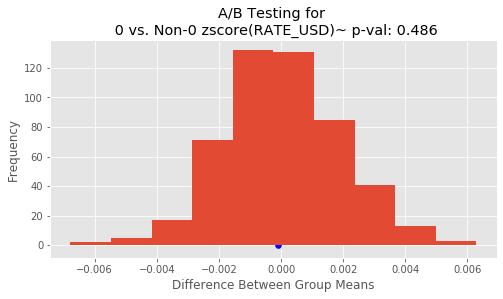

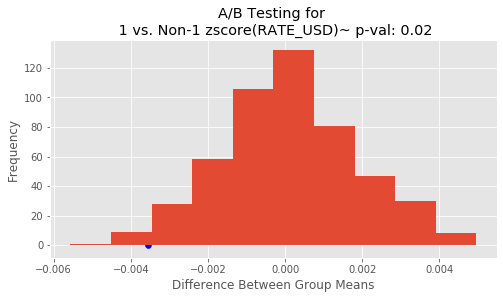

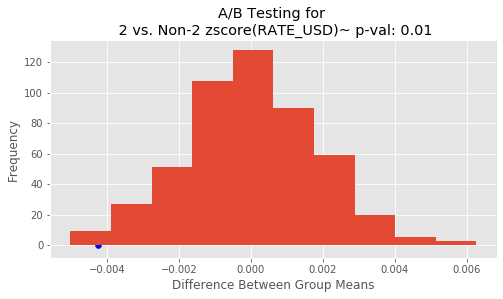

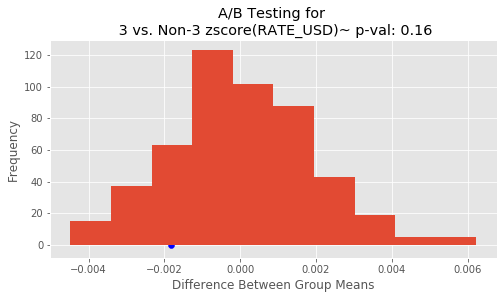

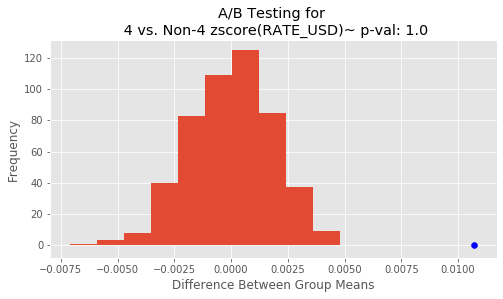

In [51]:
def ABTesting_Borough_Traffic(BORO):
    nyc_traffic_EDA_temp = oam.copy()
    BORO_CHOICE = BORO
    TABLE = nyc_traffic_EDA_temp
    GROUPBY_COLUMN_NAME = "DAY_OF_WEEK"
    AGGREG_COLUMN_NAME = "zscore(RATE_USD)"
    SHUFFLED_COLUMN_NAME = GROUPBY_COLUMN_NAME
    #SHUFFLED_COLUMN_NAME = AGGREG_COLUMN_NAME
    SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values
    AB_TESTING_PLOT_TITLE = "A/B Testing for \n {0} vs. Non-{0} {1}".format(BORO_CHOICE, AGGREG_COLUMN_NAME)
    AB_TESTING_PLOT_X_LABEL = "Difference Between Group Means"
    AB_TESTING_PLOT_Y_LABEL = "Frequency"

    test_stats = []
    T = 500

    nyc_traffic_EDA_temp[GROUPBY_COLUMN_NAME] = (nyc_traffic_EDA_temp[GROUPBY_COLUMN_NAME] == BORO_CHOICE)
    SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values

    observed_test_stat = nyc_traffic_EDA_temp.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]

    for i in range(T):
        SHUFFLED_COLUMN = np.random.permutation(SHUFFLED_COLUMN)
        # shuffle
        TABLE[SHUFFLED_COLUMN_NAME] = SHUFFLED_COLUMN
        # re-assign
        #print(len(TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean()))
        test_stat = TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]
        test_stats.append(test_stat)
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.hist(test_stats)
    ax.set_title(AB_TESTING_PLOT_TITLE  + "~ p-val: {0}".format(str((np.array(test_stats) < (observed_test_stat)).mean())))
    ax.set_xlabel(AB_TESTING_PLOT_X_LABEL)
    ax.set_ylabel(AB_TESTING_PLOT_Y_LABEL)
    
    ax.scatter(observed_test_stat,0,color="blue")
    return (ax, test_stats, observed_test_stat)

#fig, axs = plt.subplots(len(pd.unique(nyc_traffic_EDA["BoroCode"])), sharex=False, figsize=(8,16))
for i in [0,1,2,3,4]:
    day = i
    ax, test_stats, observed_test_stat = ABTesting_Borough_Traffic(day)

### ANOVA Testing with Total Variation Distance:
* Hypothesis Testing to test any relations between rate and day of week will use ANOVA.
* Null Hypothesis: The group-wise rates means per day of week are the same, and any differences are just due to chance.
* Alternative Hypothesis: The distribution of rate means are unequal
* Result: A very low p-value (less than 0.05) shows the Null Hypothesis is rejected.
* If we want to use ANOVA, we need to check assumptions: We can assume that the data is sampled randomly and independent
* But is the normality assumption passed?

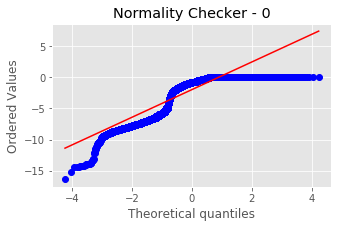

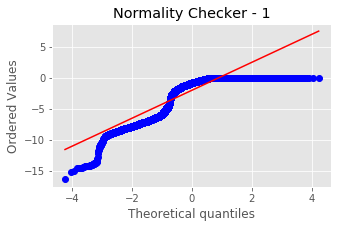

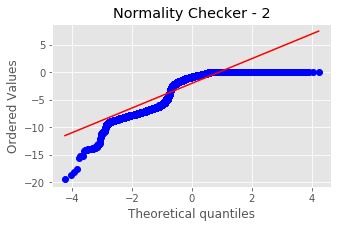

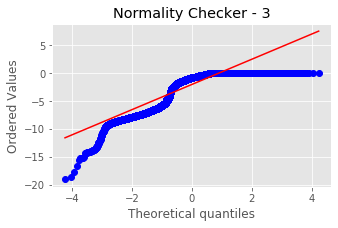

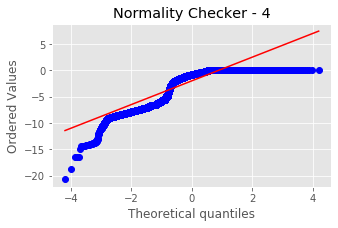

In [54]:
import scipy.stats as stats
#days_of_week = oam['DAY_OF_WEEK'].unique()
days_of_week = days_range # 0 is Monday
for day in days_of_week:
    stats.probplot(oam[oam['DAY_OF_WEEK'] == day]['zscore(RATE_USD)'].apply(np.log), dist="norm", plot=plt)
    plt.title("Normality Checker - " +  str(day))
    plt.show()

* Normality is proven. 
* Now checking the Assumption for Homogeneity of Variance. The Max Stdev-Min StDev ratio is 1.07, so it is adequately homogeneous.


In [29]:
# get the ratio of the largest to the smallest sample standard deviation
max_min_stdev_ratio = oam.groupby(["DAY_OF_WEEK"])["zscore(RATE_USD)"].std().max() / oam.groupby(["DAY_OF_WEEK"])["zscore(RATE_USD)"].std().min()
print(max_min_stdev_ratio)

1.0142609634576099


* Looking into Homogeneousness
* After this, check to see if statistically significant thursday

In [30]:
from scipy.stats import stats

day_i_rates = [oam[oam['DAY_OF_WEEK']==i]["zscore(RATE_USD)"] for i in days_range]

anova_results = stats.f_oneway(*day_i_rates)
f_stat, p_value = anova_results
print("F-stat:   {0}".format(f_stat))
print("P-value:   {0}".format(p_value))

F-stat:   1.210617739879147
P-value:   0.3038487158121851


In [31]:
oam2 = oam.copy()

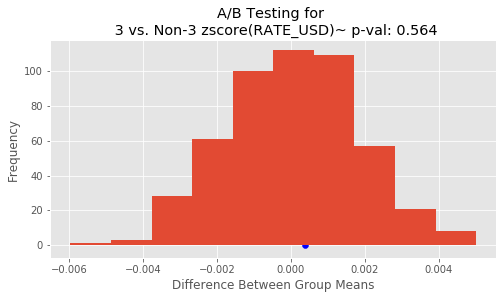

In [32]:
def ABTesting_Borough_Traffic(BORO):
    nyc_traffic_EDA_temp = oam.copy()
    BORO_CHOICE = BORO
    TABLE = nyc_traffic_EDA_temp
    GROUPBY_COLUMN_NAME = "DAY_OF_WEEK"
    AGGREG_COLUMN_NAME = "zscore(RATE_USD)"
    SHUFFLED_COLUMN_NAME = GROUPBY_COLUMN_NAME
    #SHUFFLED_COLUMN_NAME = AGGREG_COLUMN_NAME
    SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values
    AB_TESTING_PLOT_TITLE = "A/B Testing for \n {0} vs. Non-{0} {1}".format(BORO_CHOICE, AGGREG_COLUMN_NAME)
    AB_TESTING_PLOT_X_LABEL = "Difference Between Group Means"
    AB_TESTING_PLOT_Y_LABEL = "Frequency"

    test_stats = []
    T = 500

    nyc_traffic_EDA_temp[GROUPBY_COLUMN_NAME] = (nyc_traffic_EDA_temp[GROUPBY_COLUMN_NAME] == BORO_CHOICE)
    SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values

    observed_test_stat = nyc_traffic_EDA_temp.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]

    for i in range(T):
        SHUFFLED_COLUMN = np.random.permutation(SHUFFLED_COLUMN)
        # shuffle
        TABLE[SHUFFLED_COLUMN_NAME] = SHUFFLED_COLUMN
        # re-assign
        #print(len(TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean()))
        test_stat = TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]
        test_stats.append(test_stat)
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.hist(test_stats)
    ax.set_title(AB_TESTING_PLOT_TITLE  + "~ p-val: {0}".format(str((np.array(test_stats) < (observed_test_stat)).mean())))
    ax.set_xlabel(AB_TESTING_PLOT_X_LABEL)
    ax.set_ylabel(AB_TESTING_PLOT_Y_LABEL)
    
    ax.scatter(observed_test_stat,0,color="blue")
    return (ax, test_stats, observed_test_stat)

#fig, axs = plt.subplots(len(pd.unique(nyc_traffic_EDA["BoroCode"])), sharex=False, figsize=(8,16))
for i in [3]:
    day = i
    ax, test_stats, observed_test_stat = ABTesting_Borough_Traffic(day)

In [33]:
#  With and Without weekends, thursday is a good time to accept, for both anova and hypothesis testing

## Pool Classification

In [4]:
# Severe Imbalance, with FTL & PTL, and even with just PTL alone

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import pickle
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.base import TransformerMixin, BaseEstimator
import os

In [6]:
def categorical_metrics(model, category_amount):
    #importing accuracy_score, precision_score, recall_score, f1_score
    y_preds = model.predict(X_test)

    # precision : TP/(TP+FP), or correctness % of given category claims
    # recall/sensitivity: TP/(TP+FN), or correctness % of actual given category
    # Specificity: TN/(TN+FP) or anti of correctness % of actual given category
    # F1: 2*((Prec*Recall)/(Prec+Recall))
    # Type1, Type2 Errors


    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_preds)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_preds, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_preds, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_preds, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_preds, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_preds, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_preds, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_preds, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_preds, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_preds, average='weighted')))

    print('\nClassification Report\n')
    print(classification_report(y_test, y_preds, target_names=(np.arange(category_amount)).astype(str)))


    confusionMatrix = confusion_matrix(y_preds, y_test)

    confusionMatrix_normalized = confusionMatrix / confusionMatrix.sum(axis=1,keepdims=True)
    fig, ax = plt.subplots(figsize=(10,10)) 

    ax = sns.heatmap(confusionMatrix_normalized, annot=True) #notation: "annot" not "annote"
    y_lims = ax.get_ylim()

    ax.set_ylim(sum(y_lims), 0)

In [32]:
oapc = oa.copy()
oapc.columns

Index(['REFERENCE_NUMBER', 'ORDER_DATETIME_PST', 'PICKUP_DEADLINE_PST',
       'DELIVERY_TIME_CONSTRAINT', 'ORIGIN_3DIGIT_ZIP',
       'DESTINATION_3DIGIT_ZIP', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
       'PALLETIZED_LINEAR_FEET', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED',
       'HAZARDOUS', 'REEFER_ALLOWED', 'STRAIGHT_TRUCK_ALLOWED',
       'LOAD_BAR_COUNT', 'LOAD_TO_RIDE_REQUESTED', 'ESTIMATED_COST_AT_ORDER',
       'TRANSPORT_MODE', 'CARRIER_ID', 'CREATED_ON_HQ', 'RATE_USD',
       'OFFER_TYPE', 'SELF_SERVE', 'IS_OFFER_APPROVED',
       'AUTOMATICALLY_APPROVED', 'MANUALLY_APPROVED', 'WAS_EVER_UNCOVERED',
       'COVERING_OFFER', 'LOAD_DELIVERED_FROM_OFFER', 'RECOMMENDED_LOAD',
       'VALID', 'ZIP3', 'Xcoord', 'Ycoord', 'ZIP3_dest', 'Xcoord_dest',
       'Ycoord_dest'],
      dtype='object')

In [33]:
oapc["DAY_OF_WEEK"] = pd.to_datetime(oapc["CREATED_ON_HQ"]).dt.dayofweek
oapc["MONTH"] = pd.to_datetime(oapc["CREATED_ON_HQ"]).dt.month

In [34]:
oapc1 = oapc[["EXCLUSIVE_USE_REQUESTED",
              "HAZARDOUS",
              "Xcoord_dest",
              "Ycoord_dest",
              "Xcoord",
              "Ycoord",
              "TRANSPORT_MODE",
              "OFFER_TYPE"]]

In [35]:
oapc1["OFFER_TYPE"] = (oapc1["OFFER_TYPE"]=="pool").astype(int)

c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


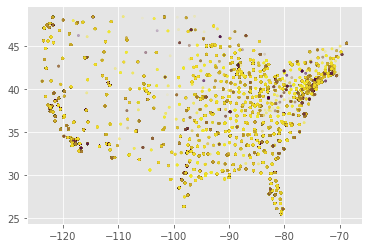

In [36]:
plt.scatter(oapc["Xcoord_dest"],
            oapc["Ycoord_dest"],
            alpha=0.1, 
            s=5, 
            c=(1-oapc1["OFFER_TYPE"]))

In [37]:
oapc1a = oapc1[oapc1["TRANSPORT_MODE"]=="PTL"]

In [38]:
oapc1a.corr()

,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,Xcoord_dest,Ycoord_dest,Xcoord,Ycoord,OFFER_TYPE
EXCLUSIVE_USE_REQUESTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HAZARDOUS,NaN,1.000000,-0.009797,-0.000926,-0.001586,0.001844,0.001892
Xcoord_dest,NaN,-0.009797,1.000000,-0.061705,0.467613,-0.202554,0.004102
Ycoord_dest,NaN,-0.000926,-0.061705,1.000000,-0.087953,0.106039,0.048415
Xcoord,NaN,-0.001586,0.467613,-0.087953,1.000000,-0.473657,-0.074509
Ycoord,NaN,0.001844,-0.202554,0.106039,-0.473657,1.000000,0.051029
OFFER_TYPE,NaN,0.001892,0.004102,0.048415,-0.074509,0.051029,1.000000


EXCLUSIVE_USE_REQUESTED    0.0
dtype: float64

In [30]:
oapc = oapc[oapc["TRANSPORT_MODE"]=="PTL"]
oapc["OFFER_TYPE"].value_counts(normalize=True)

quote    0.764946
pool     0.235054
Name: OFFER_TYPE, dtype: float64

In [31]:
oapc = pd.concat([
    oapc[oapc["OFFER_TYPE"]=="pool"],
    oapc[oapc["OFFER_TYPE"]=="quote"].sample(frac=0.25)
], axis=0
)
oapc = oapc.sample(frac=1)


In [32]:
bool_column_names = []
bool_column_names += ['FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED','HAZARDOUS', 
                     'REEFER_ALLOWED', 'STRAIGHT_TRUCK_ALLOWED','LOAD_TO_RIDE_REQUESTED']
bool_column_names += ['SELF_SERVE', 'IS_OFFER_APPROVED',
       'AUTOMATICALLY_APPROVED', 'MANUALLY_APPROVED', 'WAS_EVER_UNCOVERED',
       'COVERING_OFFER', 'LOAD_DELIVERED_FROM_OFFER', 'RECOMMENDED_LOAD', 'VALID']

categorical_column_names = [
"DELIVERY_TIME_CONSTRAINT",
"OFFER_TYPE",
#"TRANSPORT_MODE"
"DAY_OF_WEEK",
"MONTH"
]

just_ptl = True # REVISIT!
if just_ptl == False:
    categorical_column_names += ["TRANSPORT_MODE"]

numerical_column_names = []
log_fixable_numerical_column_names = [
"RATE_USD",
"ESTIMATED_COST_AT_ORDER"
]
numerical_column_names += log_fixable_numerical_column_names
log_unneeded_numerical_column_names = [
"APPROXIMATE_DRIVING_ROUTE_MILEAGE",
"PALLETIZED_LINEAR_FEET",
"LOAD_BAR_COUNT",
"Xcoord","Ycoord","Xcoord_dest","Ycoord_dest"
]
numerical_column_names += log_unneeded_numerical_column_names

In [33]:
class DebugCorr(BaseEstimator, TransformerMixin):
    def transform(self, X):
        print(X.shape)
        return X

    def fit(self, X, y, **fit_params):
        print(X.shape)
        df = pd.DataFrame(X)
        df["is_pool"]=y
        print(df.corr("spearman")["is_pool"].abs().sort_values(ascending=False).head(10))
        return self
    
class DebugPCA(BaseEstimator, TransformerMixin):
    def transform(self, X):
        print(X.shape)
        
        return X

    def fit(self, X, y, **fit_params):
        fig1, ax1 = plt.subplots()
        ax1.scatter(X[:,0], X[:,1],c=y)
        return self


MODEL_INPUT_DF_INPUT_COLUMN_NAME = "OFFER_TYPE"
MODEL_INPUT_DF_INPUT_COLUMN_NAMES = (
    bool_column_names + numerical_column_names + categorical_column_names
)

bool_columns_pipeline = Pipeline([
    ("imp", SimpleImputer(strategy="constant")),
    ("one-hot", OneHotEncoder(sparse=True,handle_unknown="ignore")),
])

categorical_columns_pipeline = Pipeline([
    ("imp", SimpleImputer(strategy="constant")),
    ("one-hot", OneHotEncoder(sparse=True,handle_unknown="ignore")),
])

numer_columns_pipeline = Pipeline([
    ("imp", SimpleImputer(
        strategy="median"
        #strategy="constant", fill_value=0
    ))
])

log1p_transformer = FunctionTransformer(np.log1p)
numer_lognorm_columns_pipeline = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("log1p", log1p_transformer),
    ("normal", StandardScaler())
]
)

ct0 = ColumnTransformer([
    ("boolean",bool_columns_pipeline,bool_column_names),
    ("categ",categorical_columns_pipeline,categorical_column_names),
    ("numer",numer_columns_pipeline,log_unneeded_numerical_column_names),
    ("numer_lognorm",numer_lognorm_columns_pipeline,log_fixable_numerical_column_names)
])


In [34]:
X = oapc[MODEL_INPUT_DF_INPUT_COLUMN_NAMES]
y = oapc[MODEL_INPUT_DF_INPUT_COLUMN_NAME]
y = (y=="pool").astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

(57560, 66)
is_pool    1.000000
51         0.022816
60         0.020567
62         0.018257
40         0.017361
29         0.016828
41         0.015244
47         0.014500
53         0.014066
30         0.014031
Name: is_pool, dtype: float64
(57560, 66)
(57560, 2)
(19187, 66)
(19187, 2)
Score: 0.5888361911711054


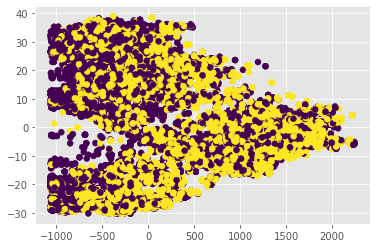

In [35]:
X = oapc[MODEL_INPUT_DF_INPUT_COLUMN_NAMES]
y = oapc[MODEL_INPUT_DF_INPUT_COLUMN_NAME]
y = (y=="pool").astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

MODEL = LogisticRegression(max_iter=500,class_weight='balanced')

pl_model = Pipeline([
        ("features", ct0),
        ("debug_corr", DebugCorr()),
        ("pca",PCA(2)),
        ("debug_pca", DebugPCA()),
        ("model", MODEL)
])
seed_i = 1
np.random.seed(seed_i)
pl_model.fit(X_train, y_train)
np.random.seed(seed_i)
#print("Cross val score:", cross_val_score(pl_model, X_train, y_train, cv=4))
print("Score:", pl_model.score(X_test, y_test))


* Correlation wise, regardless if we can't find the old columns, the values are too low. for both pearson and spearman
* **Correlation is used to find useless columns** rather than rely on PCA which assumes columns are redundant but nonetheless relevant.


In [36]:
pl_model["pca"].components_.shape

(2, 66)

(19187, 66)
(19187, 2)

Accuracy: 0.59

Micro Precision: 0.59
Micro Recall: 0.59
Micro F1-score: 0.59

Macro Precision: 0.60
Macro Recall: 0.60
Macro F1-score: 0.59

Weighted Precision: 0.60
Weighted Recall: 0.59
Weighted F1-score: 0.59

Classification Report

              precision    recall  f1-score   support

           0       0.53      0.68      0.60      8607
           1       0.66      0.52      0.58     10580

    accuracy                           0.59     19187
   macro avg       0.60      0.60      0.59     19187
weighted avg       0.60      0.59      0.59     19187



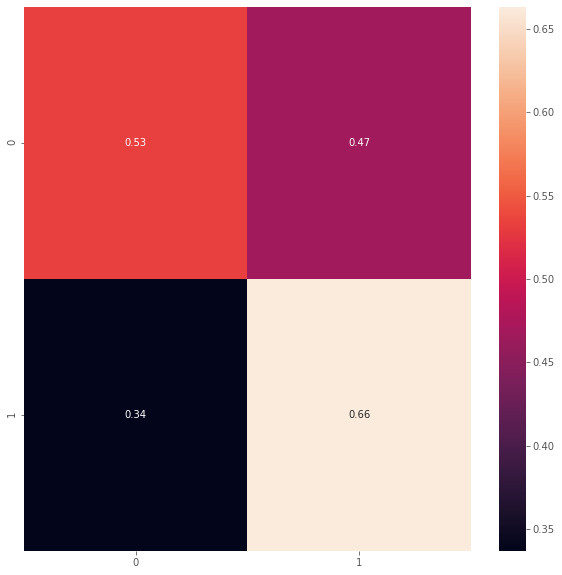

In [37]:
categorical_metrics(pl_model, 2)